In [ ]:
!pip install pyspark
!pip install -U -q PyDrive2
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 2.5 MB/s eta 0:00:00
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Selecting previously unselected package libxtst6:amd64.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../libxtst6_2%3a1.2.3-1build4_amd64.deb ...
Unpacking libxtst6:amd64 (2:1.2.3-1build4) ...
Selecting previously unselected package openjdk-8-jre-headless:amd64.
Preparing to unpack .../openjdk-8-jre-headless_8u432-ga~us1-0ubuntu

In [ ]:
!pip install pydrive2 oauth2client


In [ ]:
!pip install --upgrade pydrive2 google-api-python-client oauth2client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.151.0
    Uninstalling google-api-python-client-2.151.0:
      Successfully uninstalled google-api-python-client-2.151.0


In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1L6pCQkldvdBoaEhRFzL0VnrggEFvqON4'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Bombing_Operations.json.gz')

id='14dyBmcTBA32uXPxDbqr0bFDIzGxMTWwl'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('Aircraft_Glossary.json.gz')

In [ ]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2024-12-05 02:55:15--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 99.83.220.108, 35.71.179.82, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|99.83.220.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  25.1MB/s    in 0.5s    

2024-12-05 02:55:16 (25.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.10/json/__init__.py", line 293, in load
    return loads(fp.read(),
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.10/json/decoder.py", line 337, in decode
    obj, end 

In [ ]:
Bombing_Operations = spark.read.json("Bombing_Operations.json.gz")
Aircraft_Glossary = spark.read.json("Aircraft_Glossary.json.gz")

In [ ]:
Bombing_Operations.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- ContryFlyingMission: string (nullable = true)
 |-- MissionDate: string (nullable = true)
 |-- OperationSupported: string (nullable = true)
 |-- PeriodOfDay: string (nullable = true)
 |-- TakeoffLocation: string (nullable = true)
 |-- TargetCountry: string (nullable = true)
 |-- TimeOnTarget: double (nullable = true)
 |-- WeaponType: string (nullable = true)
 |-- WeaponsLoadedWeight: long (nullable = true)



In [ ]:
Aircraft_Glossary.printSchema()

root
 |-- AirCraft: string (nullable = true)
 |-- AirCraftName: string (nullable = true)
 |-- AirCraftType: string (nullable = true)



In [ ]:
Bombing_Operations.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              NULL|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                NULL|                  0|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              NULL|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                NULL|                  0|
|    RF-4|UNITED STATES OF ...| 1973-07-28|              NULL|          D|       UDORN AB|         LAOS|       730.0|                NULL|                  0|
|     A-1|UNITED STATES OF ...| 1970-02-02|   

In [ ]:
Aircraft_Glossary.show()

+--------+--------------------+--------------------+
|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+--------------------+
|     A-1|Douglas A-1 Skyra...|         Fighter Jet|
|    A-26|Douglas A-26 Invader|        Light Bomber|
|    A-37|Cessna A-37 Drago...|Light ground-atta...|
|     A-4|McDonnell Douglas...|         Fighter Jet|
|     A-5|North American A-...|          Bomber Jet|
|     A-6|Grumman A-6 Intruder|     Attack Aircraft|
|     A-7|  LTV A-7 Corsair II|     Attack Aircraft|
|  AC-119|Fairchild AC-119 ...|Military Transpor...|
|  AC-123|Fairchild C-123 P...|Military Transpor...|
|  AC-130|Lockheed AC-130 S...|Fixed wing ground...|
|   AC-47|Douglas AC-47 Spooky|Ground attack air...|
|    AH-1| Bell AH-1 HueyCobra|          Helicopter|
|     B-1| Rockwell B-1 Lancer|Heavy strategic b...|
|    B-52| B-52 Stratofortress|    Strategic bomber|
|    B-57|Martin B-57 Canberra|     Tactical Bomber|
|    B-66|Douglas B-66 Dest...|        Light B

In [ ]:
Aircraft_Glossary.take(5)

[Row(AirCraft='A-1', AirCraftName='Douglas A-1 Skyraider', AirCraftType='Fighter Jet'),
 Row(AirCraft='A-26', AirCraftName='Douglas A-26 Invader', AirCraftType='Light Bomber'),
 Row(AirCraft='A-37', AirCraftName='Cessna A-37 Dragonfly', AirCraftType='Light ground-attack aircraft'),
 Row(AirCraft='A-4', AirCraftName='McDonnell Douglas A-4 Skyhawk', AirCraftType='Fighter Jet'),
 Row(AirCraft='A-5', AirCraftName='North American A-5 Vigilante', AirCraftType='Bomber Jet')]

In [ ]:
Aircraft_Glossary.select("AirCraft","AirCraftname").show()

+--------+--------------------+
|AirCraft|        AirCraftname|
+--------+--------------------+
|     A-1|Douglas A-1 Skyra...|
|    A-26|Douglas A-26 Invader|
|    A-37|Cessna A-37 Drago...|
|     A-4|McDonnell Douglas...|
|     A-5|North American A-...|
|     A-6|Grumman A-6 Intruder|
|     A-7|  LTV A-7 Corsair II|
|  AC-119|Fairchild AC-119 ...|
|  AC-123|Fairchild C-123 P...|
|  AC-130|Lockheed AC-130 S...|
|   AC-47|Douglas AC-47 Spooky|
|    AH-1| Bell AH-1 HueyCobra|
|     B-1| Rockwell B-1 Lancer|
|    B-52| B-52 Stratofortress|
|    B-57|Martin B-57 Canberra|
|    B-66|Douglas B-66 Dest...|
|     C-1| Grumman C-1A Trader|
|   C-117|     C-117D Skytrain|
|   C-119|Fairchild C-119 F...|
|   C-123|Fairchild C-123 P...|
+--------+--------------------+
only showing top 20 rows



In [ ]:
Aircraft_Glossary.where(Aircraft_Glossary.AirCraft=="A-1").show()

+--------+--------------------+------------+
|AirCraft|        AirCraftName|AirCraftType|
+--------+--------------------+------------+
|     A-1|Douglas A-1 Skyra...| Fighter Jet|
+--------+--------------------+------------+



In [ ]:
Aircraft_Glossary.where(Aircraft_Glossary.AirCraft=="A-1").collect()

[Row(AirCraft='A-1', AirCraftName='Douglas A-1 Skyraider', AirCraftType='Fighter Jet')]

In [ ]:
Aircraft_Glossary.where("AirCraft == 'A-1'").show()

+--------+--------------------+------------+
|AirCraft|        AirCraftName|AirCraftType|
+--------+--------------------+------------+
|     A-1|Douglas A-1 Skyra...| Fighter Jet|
+--------+--------------------+------------+



In [ ]:
Bombing_Operations.count()

4400775

In [ ]:
Aircraft_Glossary.count()

104

In [ ]:
print("There are %d aircrafts" % (Aircraft_Glossary.count()))

There are 104 aircrafts


In [ ]:
Aircraft_Glossary.where("AirCraftType == 'Light Bomber'").show()

+--------+--------------------+------------+
|AirCraft|        AirCraftName|AirCraftType|
+--------+--------------------+------------+
|    A-26|Douglas A-26 Invader|Light Bomber|
|    B-66|Douglas B-66 Dest...|Light Bomber|
|   RB-66|Douglas RB-66 Des...|Light Bomber|
+--------+--------------------+------------+



In [ ]:
Bombing_Operations.where("TakeOffLocation=='UDORN AB'").select("AirCraft", "MissionDate","ContryFlyingMission").show()

+--------+-----------+--------------------+
|AirCraft|MissionDate| ContryFlyingMission|
+--------+-----------+--------------------+
|    RF-4| 1973-07-28|UNITED STATES OF ...|
|     F-4| 1971-12-27|UNITED STATES OF ...|
|    RF-4| 1972-01-08|UNITED STATES OF ...|
|    RF-4| 1970-12-08|UNITED STATES OF ...|
|    RF-4| 1974-08-01|UNITED STATES OF ...|
|     F-4| 1972-04-25|UNITED STATES OF ...|
|    RF-4| 1973-08-25|UNITED STATES OF ...|
|    RF-4| 1973-09-16|UNITED STATES OF ...|
|     F-4| 1970-04-02|UNITED STATES OF ...|
|    T-28| 1970-04-12|                LAOS|
|     F-4| 1971-03-06|UNITED STATES OF ...|
|     F-4| 1972-12-06|UNITED STATES OF ...|
|     F-4| 1970-03-12|UNITED STATES OF ...|
|    RF-4| 1973-05-12|UNITED STATES OF ...|
|     F-4| 1974-06-11|UNITED STATES OF ...|
|     F-4| 1973-04-30|UNITED STATES OF ...|
|    RF-4| 1970-12-11|UNITED STATES OF ...|
|  WC-130| 1971-08-06|UNITED STATES OF ...|
|    RF-4| 1975-04-01|UNITED STATES OF ...|
|     F-4| 1970-02-28|UNITED STA

In [ ]:
df_a_1 = Bombing_Operations.where('AirCraft=="A-1"').show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|     A-1|UNITED STATES OF ...| 1970-02-02|              NULL|          N|  NAKHON PHANOM|         LAOS|      1415.0|BLU27 FIRE BOMB (...|              17400|
|     A-1|     VIETNAM (SOUTH)| 1972-04-29|              NULL|          D|       BIEN HOA|SOUTH VIETNAM|       700.0|                NULL|              84960|
|     A-1|     VIETNAM (SOUTH)| 1972-08-02|              NULL|       NULL|       BIEN HOA|SOUTH VIETNAM|         0.0|                NULL|                  0|
|     A-1|     VIETNAM (SOUTH)| 1970-04-27|   

In [ ]:
df_a_1 = Bombing_Operations.where('AirCraft=="A-1"')

In [ ]:
df_a_1.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|     A-1|UNITED STATES OF ...| 1970-02-02|              NULL|          N|  NAKHON PHANOM|         LAOS|      1415.0|BLU27 FIRE BOMB (...|              17400|
|     A-1|     VIETNAM (SOUTH)| 1972-04-29|              NULL|          D|       BIEN HOA|SOUTH VIETNAM|       700.0|                NULL|              84960|
|     A-1|     VIETNAM (SOUTH)| 1972-08-02|              NULL|       NULL|       BIEN HOA|SOUTH VIETNAM|         0.0|                NULL|                  0|
|     A-1|     VIETNAM (SOUTH)| 1970-04-27|   

In [ ]:
Bombing_Operations.where("MissionDate==1971")

DataFrame[AirCraft: string, ContryFlyingMission: string, MissionDate: string, OperationSupported: string, PeriodOfDay: string, TakeoffLocation: string, TargetCountry: string, TimeOnTarget: double, WeaponType: string, WeaponsLoadedWeight: bigint]

In [ ]:
Q2 = Bombing_Operations.where("ContryFlyingMission == 'VIETNAM (SOUTH)'")


In [ ]:
Q2.show()

+--------+-------------------+-----------+------------------+-----------+---------------+-------------+------------+------------+-------------------+
|AirCraft|ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|  WeaponType|WeaponsLoadedWeight|
+--------+-------------------+-----------+------------------+-----------+---------------+-------------+------------+------------+-------------------+
|    A-37|    VIETNAM (SOUTH)| 1970-10-08|              NULL|          D|         DANANG|SOUTH VIETNAM|      1240.0|        NULL|                  0|
|     O-1|    VIETNAM (SOUTH)| 1973-10-24|              NULL|          D|      NHA TRANG|SOUTH VIETNAM|       800.0|        NULL|                  0|
|    UH-1|    VIETNAM (SOUTH)| 1974-03-19|              NULL|          D|        PHU CAT|SOUTH VIETNAM|       800.0|CARGO (TONS)|                  0|
|   CH-47|    VIETNAM (SOUTH)| 1971-03-29|              NULL|          D|       BIEN HOA|SOUTH VIETN

In [ ]:
Q2 = Bombing_Operations.where("ContryFlyingMission == 'VIETNAM (SOUTH)'")

In [ ]:
Q1 = Aircraft_Glossary.where("AirCraftType == 'Light Bomber'")

In [ ]:
Q1.show()

+--------+--------------------+------------+
|AirCraft|        AirCraftName|AirCraftType|
+--------+--------------------+------------+
|    A-26|Douglas A-26 Invader|Light Bomber|
|    B-66|Douglas B-66 Dest...|Light Bomber|
|   RB-66|Douglas RB-66 Des...|Light Bomber|
+--------+--------------------+------------+



In [ ]:
Q4 = Bombing_Operations.where("MissionDate >= '1971-01-01' AND MissionDate <= '1971-12-31'")

In [ ]:
Q4.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              NULL|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                NULL|                  0|
|     F-4|UNITED STATES OF ...| 1971-12-27|              NULL|       NULL|       UDORN AB|         LAOS|         0.0|                NULL|                  0|
|     A-6|UNITED STATES OF ...| 1971-05-12|              NULL|          N|    TONKIN GULF|         LAOS|      1304.0|CBU24 AN PR/MT (B...|              33200|
|   EB-66|UNITED STATES OF ...| 1971-12-03|   

In [ ]:
df_q3 = Bombing_Operations.groupBy("ContryFlyingMission").agg(count("*").alias("NumberOfMissions"))

In [ ]:
df_q3.sort(desc("NumberOfMissions")).show()

+--------------------+----------------+
| ContryFlyingMission|NumberOfMissions|
+--------------------+----------------+
|UNITED STATES OF ...|         3708997|
|     VIETNAM (SOUTH)|          622013|
|                LAOS|           32777|
|       KOREA (SOUTH)|           24469|
|           AUSTRALIA|           12519|
+--------------------+----------------+



In [ ]:
df_q5 = Bombing_Operations.groupBy(["MissionDate","TargetCountry"]).agg(avg("TimeOnTarget").alias("Avg.Time")).sort("MissionDate","TargetCountry")

In [ ]:
df_q5.show()

+-----------+-------------+------------------+
|MissionDate|TargetCountry|          Avg.Time|
+-----------+-------------+------------------+
| 1965-10-01|         LAOS|            1203.0|
| 1965-10-01|NORTH VIETNAM| 1183.111111111111|
| 1965-10-01|SOUTH VIETNAM|1275.3181818181818|
| 1965-10-02|         LAOS|1351.0833333333333|
| 1965-10-02|NORTH VIETNAM|1235.1684981684982|
| 1965-10-02|SOUTH VIETNAM|1216.1370262390672|
| 1965-10-03|         LAOS|1037.7777777777778|
| 1965-10-03|NORTH VIETNAM|1144.1968503937007|
| 1965-10-03|SOUTH VIETNAM| 1267.709480122324|
| 1965-10-04|         LAOS| 998.3181818181819|
| 1965-10-04|NORTH VIETNAM|1281.5868725868727|
| 1965-10-04|SOUTH VIETNAM|1131.0796812749004|
| 1965-10-05|         LAOS|1301.1666666666667|
| 1965-10-05|NORTH VIETNAM| 1240.695652173913|
| 1965-10-05|SOUTH VIETNAM|1239.5200803212851|
| 1965-10-06|         LAOS|1190.0461538461539|
| 1965-10-06|NORTH VIETNAM| 981.1253918495298|
| 1965-10-06|SOUTH VIETNAM|1266.1638418079096|
| 1965-10-07|

In [ ]:
df_q6 = Bombing_Operations.groupBy("AirCraft").agg(count("*").alias("NumberOfMissions")).sort("NumberOfMissions")

In [ ]:
df_q6.show()

+--------+----------------+
|AirCraft|NumberOfMissions|
+--------+----------------+
|  LC-130|               1|
|    U-1A|               1|
|     E-3|               1|
|    C-76|               1|
|     R64|               1|
|     R44|               1|
|     P41|               1|
|   C-121|               1|
|   UH-34|               2|
|  UC-130|               2|
|  EC-211|               2|
|     B-1|               2|
|    F-10|               2|
|    H-47|               3|
|      T9|               4|
|      A8|               4|
|    F-14|               5|
|    U-10|               5|
|  NC-123|               7|
|     A-5|               8|
+--------+----------------+
only showing top 20 rows



In [ ]:
df_q7 = Bombing_Operations.groupBy("AirCraft").agg(max("TimeOnTarget").alias("Max.Time")).sort("AirCraft")


In [ ]:
df_q7.show()

+--------+--------+
|AirCraft|Max.Time|
+--------+--------+
|     A-1|  8033.0|
|    A-26|  2400.0|
|     A-3|  2356.0|
|    A-37|  2359.0|
|     A-4|  6391.0|
|     A-5|  1705.0|
|     A-6|  2359.0|
|     A-7|  2359.0|
|      A8|   800.0|
|  AC-119|  2359.0|
|  AC-123|  2145.0|
|  AC-130|  2448.0|
|   AC-47|  2400.0|
|    AH-1|  2350.0|
|   AU-24|  1400.0|
|     B-1|  1950.0|
|    B-52|  2400.0|
|    B-57|  2500.0|
|    B-66|  2359.0|
|     C-1|   810.0|
+--------+--------+
only showing top 20 rows



In [ ]:
df_q7 = Bombing_Operations.groupBy("AirCraft", "TargetCountry")
    .agg(F.max("TimeOnTarget").alias("Max.AttackTime"))
    .sort("AirCraft", "TargetCountry")

In [ ]:
df_q3 = Bombing_Operations.groupBy("ContryFlyingMission").agg(count("*").alias("NumberOfMissions"))

In [ ]:
df_q3.sort(desc("NumberOfMissions")).show()

+--------------------+----------------+
| ContryFlyingMission|NumberOfMissions|
+--------------------+----------------+
|UNITED STATES OF ...|         3708997|
|     VIETNAM (SOUTH)|          622013|
|                LAOS|           32777|
|       KOREA (SOUTH)|           24469|
|           AUSTRALIA|           12519|
+--------------------+----------------+



In [ ]:
mission_count_pd = df_q3.toPandas()
mission_count_pd.head()

,ContryFlyingMission,NumberOfMissions
0,VIETNAM (SOUTH),622013
1,KOREA (SOUTH),24469
2,UNITED STATES OF AMERICA,3708997
3,AUSTRALIA,12519
4,LAOS,32777


<Axes: xlabel='ContryFlyingMission'>

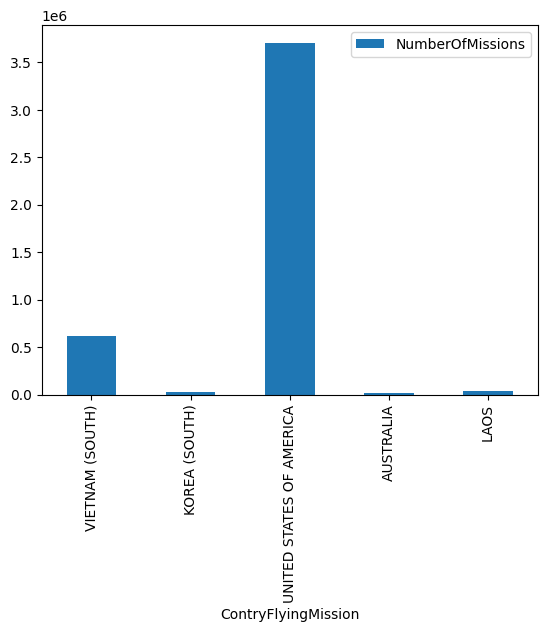

In [ ]:
mission_count_pd.plot(kind="bar", x= "ContryFlyingMission", y="NumberOfMissions")

In [ ]:
Bombing_Operations.createOrReplaceTempView("Bombing_operations")

query = """ SELECT ContryFlyingMission, count(*) as NumberOfMissions
            FROM Bombing_Operations
            GROUP BY ContryFlyingMission
            ORDER BY NumberOfMissions desc
        """

missions_count = spark.sql(query)

In [ ]:
missions_count.show()

+--------------------+----------------+
| ContryFlyingMission|NumberOfMissions|
+--------------------+----------------+
|UNITED STATES OF ...|         3708997|
|     VIETNAM (SOUTH)|          622013|
|                LAOS|           32777|
|       KOREA (SOUTH)|           24469|
|           AUSTRALIA|           12519|
+--------------------+----------------+



In [ ]:
join_results = Bombing_Operations.join(Aircraft_Glossary, Bombing_Operations.AirCraft == Aircraft_Glossary.AirCraft)

In [ ]:
join_results.show()

+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+--------+--------------------+--------------------+
|AirCraft| ContryFlyingMission|MissionDate|OperationSupported|PeriodOfDay|TakeoffLocation|TargetCountry|TimeOnTarget|          WeaponType|WeaponsLoadedWeight|AirCraft|        AirCraftName|        AirCraftType|
+--------+--------------------+-----------+------------------+-----------+---------------+-------------+------------+--------------------+-------------------+--------+--------------------+--------------------+
|   EC-47|UNITED STATES OF ...| 1971-06-05|              NULL|          D|   TAN SON NHUT|     CAMBODIA|      1005.0|                NULL|                  0|   EC-47|Douglas C-47 Skyt...|Military Transpor...|
|   EC-47|UNITED STATES OF ...| 1972-12-26|              NULL|          D|  NAKHON PHANOM|SOUTH VIETNAM|       530.0|                NULL|                  0|  

In [ ]:
missionsPerAircraftType = join_results.groupBy("AirCraftType").agg(count("*").alias("NumOperations")).sort("AirCraftType")
missionsPerAircraftType.show()

+--------------------+-------------+
|        AirCraftType|NumOperations|
+--------------------+-------------+
|Aerial refuelling...|         8266|
|Airborne early wa...|        17226|
| Airliner/ Transport|            1|
|Airliner/transpor...|          397|
|     Attack Aircraft|       315246|
|          Bomber Jet|            8|
|    Cargo Helicopter|         2571|
|    Cargo Prop plane|          176|
|Carrier-base all-...|            2|
|Carrier-based Ear...|         1498|
|Carrier-based Fig...|        58691|
|Close -Support He...|         2174|
|Close air support...|          921|
|Early Warning air...|         1380|
|         Fighter Jet|       882594|
|  Fighter Jet Bomber|      1073126|
|  Fighter Prop Plane|         3882|
|  Fighter bomber jet|       242231|
|        Fighter jet |        10322|
|Fixed wing ground...|        75058|
+--------------------+-------------+
only showing top 20 rows



In [ ]:
missionsPerAircraftType.cache()

DataFrame[AirCraftType: string, NumOperations: bigint]

In [ ]:
%time missionsPerAircraftType.show()

+--------------------+-------------+
|        AirCraftType|NumOperations|
+--------------------+-------------+
|Aerial refuelling...|         8266|
|Airborne early wa...|        17226|
| Airliner/ Transport|            1|
|Airliner/transpor...|          397|
|     Attack Aircraft|       315246|
|          Bomber Jet|            8|
|    Cargo Helicopter|         2571|
|    Cargo Prop plane|          176|
|Carrier-base all-...|            2|
|Carrier-based Ear...|         1498|
|Carrier-based Fig...|        58691|
|Close -Support He...|         2174|
|Close air support...|          921|
|Early Warning air...|         1380|
|         Fighter Jet|       882594|
|  Fighter Jet Bomber|      1073126|
|  Fighter Prop Plane|         3882|
|  Fighter bomber jet|       242231|
|        Fighter jet |        10322|
|Fixed wing ground...|        75058|
+--------------------+-------------+
only showing top 20 rows

CPU times: user 138 ms, sys: 13.5 ms, total: 151 ms
Wall time: 24.1 s


In [ ]:
missionsPerAircraftType.write.mode('overwrite').json("missionsPerACType.json")

In [ ]:
print(missionsPerAircraftType.count())

56


In [ ]:
Bombing_Operations.createOrReplaceTempView("bombing")
Aircraft_Glossary.createOrReplaceTempView("aircraft")

query = """ SELECT AirCraftType, count(*) as NumOperations
            FROM bombing b, aircraft a
            WHERE b.AirCraft = a.AirCraft
            GROUP BY AirCraftType
            ORDER BY AirCraftType
        """

spark.sql(query).show()

+--------------------+-------------+
|        AirCraftType|NumOperations|
+--------------------+-------------+
|Aerial refuelling...|         8266|
|Airborne early wa...|        17226|
| Airliner/ Transport|            1|
|Airliner/transpor...|          397|
|     Attack Aircraft|       315246|
|          Bomber Jet|            8|
|    Cargo Helicopter|         2571|
|    Cargo Prop plane|          176|
|Carrier-base all-...|            2|
|Carrier-based Ear...|         1498|
|Carrier-based Fig...|        58691|
|Close -Support He...|         2174|
|Close air support...|          921|
|Early Warning air...|         1380|
|         Fighter Jet|       882594|
|  Fighter Jet Bomber|      1073126|
|  Fighter Prop Plane|         3882|
|  Fighter bomber jet|       242231|
|        Fighter jet |        10322|
|Fixed wing ground...|        75058|
+--------------------+-------------+
only showing top 20 rows



In [ ]:
Bombing_Operations.createOrReplaceTempView("bombing")
Aircraft_Glossary.createOrReplaceTempView("aircraft")

query = """ SELECT bombing.AirCraft, AirCraftName, COUNT(*) AS NUM_OPERATIONS
            FROM bombing , aircraft
            WHERE bombing.aircraft = aircraft.aircraft AND periodofday = 'D'
            GROUP BY bombing.AirCraft, AirCraftName
            ORDER BY COUNT(*) DESC
        """
result1 = spark.sql(query)


In [ ]:
result1.show()

+--------+--------------------+--------------+
|AirCraft|        AirCraftName|NUM_OPERATIONS|
+--------+--------------------+--------------+
|     F-4|McDonnell Douglas...|        580796|
|   F-100|North American F-...|        381778|
|     A-1|Douglas A-1 Skyra...|        296182|
|     A-4|McDonnell Douglas...|        272257|
|    A-37|Cessna A-37 Drago...|        239086|
|    RF-4|McDonnell F-4 Pha...|        182608|
|    UH-1|  Bell UH-1 Iroquois|        146238|
|   F-105|Republic F-105 Th...|        125196|
|     A-7|  LTV A-7 Corsair II|        113391|
|     F-8| Vought F-8 Crusader|         82390|
|  RF-101|McDonnell F-101 V...|         67816|
|     A-6|Grumman A-6 Intruder|         53183|
|     O-1| Cessna O-1 Bird Dog|         48104|
|   EC-47|Douglas C-47 Skyt...|         44069|
|     F-5|       Northrop F-5 |         37117|
|    T-28| T-28 Trojan Trainer|         34220|
|    B-57|Martin B-57 Canberra|         33767|
|     O-2|Cessna O-2 Skymaster|         27053|
|    U-17|   

In [ ]:
from pyspark.sql.functions import avg

df_q7 = Bombing_Operations.groupBy("AirCraft") .agg(avg("WeaponsLoadedWeight").alias("AvgWeaponsLoadedWeight")) .sort("AvgWeaponsLoadedWeight", ascending=False)

df_q7.show()


+--------+----------------------+
|AirCraft|AvgWeaponsLoadedWeight|
+--------+----------------------+
|    B-52|    232319.64816347125|
|    AH-1|    64683.965170278636|
|   F-111|    51604.531187319604|
|     A-7|    23560.346184239894|
|     F-5|     15831.82239555989|
|     F-4|    15007.247900176168|
|     A-6|    12546.330295087862|
|    A-37|      11468.2285227158|
|  AC-123|       9507.0559114735|
|    UH-1|     7113.977876800666|
|     A-1|      6850.50426501682|
|   AC-47|    5720.5106238912285|
|   OV-10|     5002.150769984886|
|   F-105|     4530.625852859483|
|     A-4|     4003.648370534218|
|    B-57|    3730.4197083399213|
|    F-14|                3728.0|
|   C-130|     2747.465372314833|
|   F-100|    2499.8695370913965|
|  AC-119|    2264.7700359359687|
+--------+----------------------+
only showing top 20 rows



In [ ]:
WeaponsLoadedWeight_pd = df_q7.toPandas()
WeaponsLoadedWeight_pd.head()

,AirCraft,AvgWeaponsLoadedWeight
0,B-52,232319.648163
1,AH-1,64683.965170
2,F-111,51604.531187
3,A-7,23560.346184
4,F-5,15831.822396


<Axes: xlabel='AirCraft'>

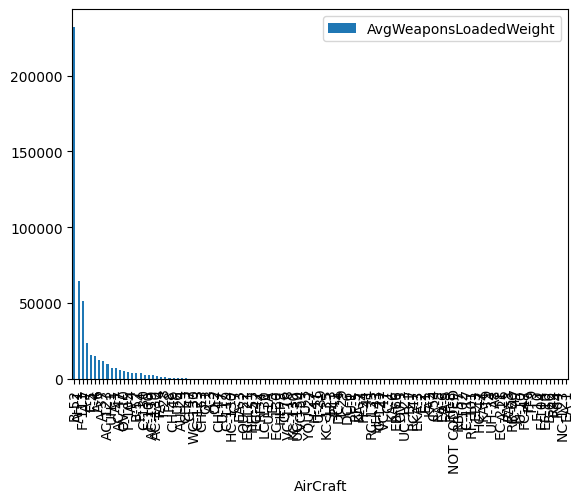

In [ ]:
WeaponsLoadedWeight_pd.plot(kind="bar", x="AirCraft", y="AvgWeaponsLoadedWeight")



In [ ]:
print(WeaponsLoadedWeight_pd.dtypes)


AirCraft                   object
AvgWeaponsLoadedWeight    float64
dtype: object
